In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math
import seaborn as sns; sns.set()

# algorithms
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV


In [3]:
# Read in boston data

bd = pd.read_csv("/Users/tk/ASU/STP494/data/Boston.csv")

In [4]:
# set target to median value (medv) and feature to socioeconomic status (lstat)
# return a numpy representation of the dataframe column bd.lstat with axis label removed, convert 1D array to column vector with np.newaxis (add dimension)
y = bd['medv']
X = bd['lstat'].values[:,np.newaxis]

Text(0, 0.5, 'mdev')

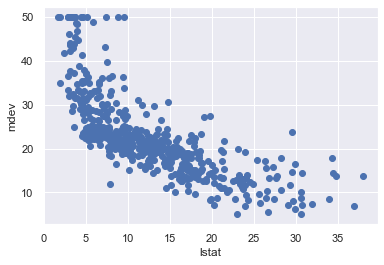

In [7]:
#plot X and y
plt.scatter(X,y)
plt.xlabel('lstat')
plt.ylabel('mdev')

In [8]:
# create knn model object with parameter 50
knnmod = KNeighborsRegressor(n_neighbors=50)

In [9]:
# Fit training data in model (all X and y, this is an initial example for demonstration)
knnmod.fit(X,y)

KNeighborsRegressor(n_neighbors=50)

In [18]:

# sort feature elements, reshape array to 506 x 1 dimensionality using reshape (also can use newaxis)
# fit on sorted data (Xtest)
Xtest = np.sort(X[:,0]).reshape(-1,1)
yhat = knnmod.predict(Xtest)

Text(0, 0.5, 'medv')

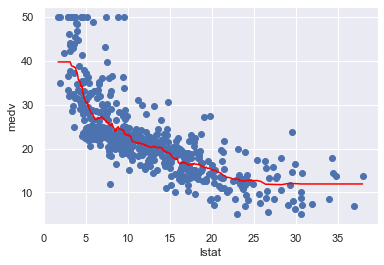

In [19]:
# plot fit using KNN model with k=50 against data
plt.scatter(X,y)
plt.plot(Xtest,yhat,c='red')
plt.xlabel('lstat')
plt.ylabel('medv')

In [21]:
# demonstrate with simple train/test split, 80/20
rng = np.random.RandomState(123)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=rng, test_size=.2)

In [22]:
# KNN model object for train test split, using same paramter value
kmod = KNeighborsRegressor(n_neighbors=50)

In [23]:
# perform model fit on test split
kmod.fit(Xtrain,ytrain)


KNeighborsRegressor(n_neighbors=50)

In [24]:
# predict on test split data
yhat = kmod.predict(Xtest)

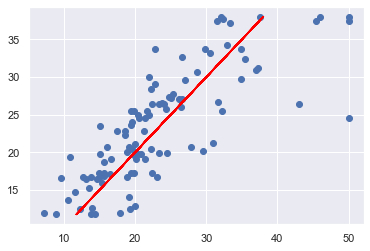

In [25]:
# plot test split predictions against y test values, show variance
plt.scatter(ytest,yhat)
plt.plot(yhat,yhat,c='red')

In [26]:
# get RMSE for predictions
k50mse = mean_squared_error(ytest,yhat)

In [27]:
# check value of RMSE against SSE
check  = np.sum((yhat-ytest)**2)/len(ytest)
print('val from fun:',k50mse,' and check val: ',check)

val from fun: 31.183327058823526  and check val:  31.183327058823526


In [28]:
# perform multiple iterations of KNN fit/predict to get model variance

rng = np.random.RandomState(123)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=rng, test_size=.2)

#kvec is number of times to perform KNN (each with successive number for the parameter of n for length of kvec)
kvec = np.arange(348) + 2 

# Store out of sample RMSE
ormsev = np.zeros(len(kvec))

# Store in sample RMSE
irmsev = np.zeros(len(kvec)) 

In [31]:
for i in range(len(kvec)):
   tmod = KNeighborsRegressor(n_neighbors=kvec[i])
   tmod.fit(Xtrain,ytrain)
   yhat = tmod.predict(Xtest)
   ormsev[i] = math.sqrt(mean_squared_error(ytest,yhat))
   yhat = tmod.predict(Xtrain)
   irmsev[i] = math.sqrt(mean_squared_error(ytrain,yhat))

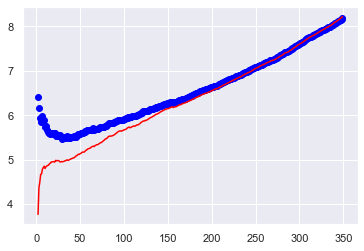

In [32]:
# plot out of sample RMSE vs in sample RMSE for comparison, where x is  number of neighbors (KNN parameter) and y is RMSE
# note point of convergence and critical min point for out of sample RMSE
plt.scatter(kvec,ormsev,c='blue')
plt.plot(kvec,irmsev,c='red')

Text(0.5, 1.0, 'rmse: blue: out of sample, red: in sample')

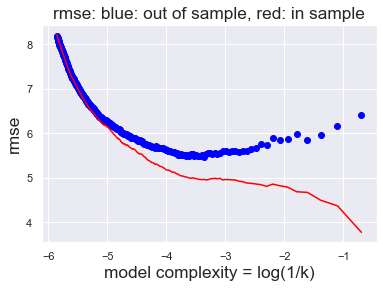

In [33]:
# plot rmse vs model complexity using log(1/k) 

mcmp = np.log(1/kvec)

# note U shape and approximate point of optimization 
plt.scatter(mcmp,ormsev,c='blue')
plt.plot(mcmp,irmsev,c='red')
plt.xlabel('model complexity = log(1/k)',size='x-large')
plt.ylabel('rmse',size='x-large')
plt.title('rmse: blue: out of sample, red: in sample',size='x-large')

In [34]:
# Demonstrate cross-validation using K=40 from above

tempmod = KNeighborsRegressor(n_neighbors=40)

In [35]:
# perform 5 fold cross validation using tempmod, X and y data, scoring with MSE
cvres = cross_val_score(tempmod,X,y,cv=5,scoring='neg_mean_squared_error')

In [36]:
# take the mean of the Cross Validation residuals (error) and sqrt to get RMSE

rmse = math.sqrt(np.mean(-cvres)) 
print('the rmse for k=40 based on 5-fold is:', rmse)


the rmse for k=40 based on 5-fold is: 5.538843916375064


In [37]:
# shuffle the data (without replacement) to perform another 5-fold CV for comparison by shuffling the indeces of X randomly into an array called indices
# set sample from y and x according to shuffled indices, note Xs must be 2D
np.random.seed(123) 
indices = np.random.choice(X.shape[0],X.shape[0],replace=False)
ys = y[indices]
Xs = X[indices,:]
cvres = cross_val_score(tempmod,Xs,ys,cv=5,scoring='neg_mean_squared_error')
rmse = math.sqrt(np.mean(-cvres))
print('the rmse for k=40 based on 5-fold is:', rmse)

the rmse for k=40 based on 5-fold is: 5.21801545581757


In [51]:
# k = 10 Cross validation of grid of k values using sklearn validation_curve

#create KNN model without paramter defined
model = KNeighborsRegressor()



In [52]:
# Using train and test split, perform 10 fold cross validation on every number of k in kvec
%time
trainS, testS = validation_curve(model,X,y,'n_neighbors',kvec,cv=10,scoring='neg_mean_squared_error')

/Users/tk/opt/miniconda3/envs/data-science-env/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 2

In [53]:
# as before, transform -MSE from train and test to RMSE
trrmse = np.sqrt(-trainS.mean(axis=1))
termse = np.sqrt(-testS.mean(axis=1))

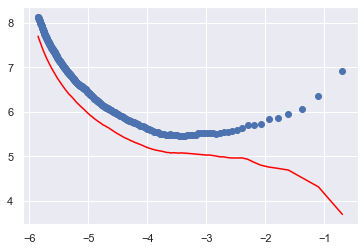

In [54]:
#plot model complexity (log 1/k) against RMSE for train and test
plt.scatter(mcmp,termse)
plt.plot(mcmp,trrmse,c='red')


In [55]:
# perform 10 fold cross validation using GridSearchCV

#store kvec hyperparameters in dictionary for n_neighbors
param_grid={'n_neighbors' : kvec}

#GridSearch object using param_grib dictionary KNN model from above
grid = GridSearchCV(model,param_grid,cv=10,scoring='neg_mean_squared_error')

In [56]:
#using grid object, perform fit on data, note how much more performant GridSearchCV is with a dictionary 
%time
grid.fit(X,y)


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        9...
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
       327, 328, 329, 330, 331

In [57]:
#get best hyperparamter from grid object
grid.best_params_ 

# index of best hyperparameter
grid.best_index_ 

print(kvec[grid.best_index_])

31


In [58]:
# results of grid search (array of MSE for each k)
temp = grid.cv_results_

# show metrics that you can extract from temp
print(temp.keys())

# for each k hyperparameter using 10 fold CV, each element is average MSE
temp['mean_test_score']

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


array([-47.93542431, -40.52296937, -36.75137488, -35.32375553,
       -34.27436889, -34.0581999 , -32.86550072, -32.43827793,
       -32.44614335, -31.88676974, -31.36340691, -31.15063837,
       -30.79486946, -30.84664902, -30.60478188, -30.36526222,
       -30.49533023, -30.57516066, -30.54165833, -30.50304135,
       -30.45915392, -30.44841509, -30.12366577, -30.08544358,
       -30.04295464, -29.94061971, -29.92907083, -29.89857267,
       -29.7722572 , -29.75745011, -29.85040964, -29.99911454,
       -29.99104046, -29.99107136, -30.10124305, -30.19472062,
       -30.1334706 , -30.04381776, -30.0165785 , -30.18408281,
       -30.25747395, -30.21816322, -30.31025481, -30.5132332 ,
       -30.7371929 , -30.70521519, -30.79583772, -30.88868085,
       -31.02122086, -31.23361871, -31.33302721, -31.42596378,
       -31.53582721, -31.6261664 , -31.72325817, -31.9404984 ,
       -32.0311006 , -32.1685986 , -32.24223937, -32.31077269,
       -32.40937105, -32.49579449, -32.69052289, -32.84

In [59]:
# as above, transform -MSE to RMSE

rmsevals = np.sqrt(-temp['mean_test_score'])

Text(0.5, 1.0, 'rmse from GridSearch')

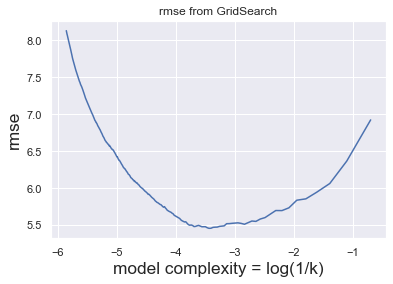

In [60]:
# plot model complexity (log 1/k) against RMSE
# note clear critical(global) min point 
plt.plot(mcmp,rmsevals) 
plt.xlabel('model complexity = log(1/k)',size='x-large')
plt.ylabel('rmse',size='x-large')
plt.title('rmse from GridSearch')